In [1]:
from sklearn.linear_model import LinearRegression
from doubt import Boot
from doubt.datasets import PowerPlant
from distributions import DistributionShift
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X, y = PowerPlant().split()

In [3]:
X = pd.DataFrame(X,columns = ['one','two','three','four'])

In [4]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y)

In [5]:
shift = DistributionShift(strategy='covariateShift')
clf = Boot(LinearRegression())
pipe = Pipeline([("shift", shift), ("clf", clf)])
pipe.fit(X_tr, y_tr)

Pipeline(steps=[('shift',
                 DistributionShift(cols=Index(['one', 'two', 'three', 'four'], dtype='object'))),
                ('clf', Boot(model=LinearRegression, random_seed=None))])

In [6]:
preds = []
for p in tqdm(range(0,100)):
    pipe.set_params(shift__param=p)

    preds.append(np.mean(pipe.predict(X_te)))


100%|██████████| 100/100 [00:00<00:00, 554.32it/s]


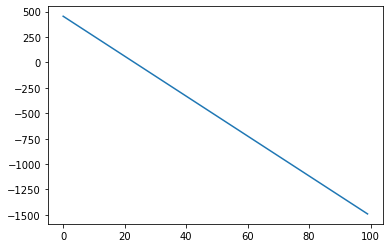

In [7]:
plt.figure()
plt.plot(preds)
plt.show()